# P2- Project presentation and deliverable

### Data Processing

In [111]:
import pandas as pd
import numpy as np
import plotly.express as px
import altair as alt
from vega_datasets import data
from ipywidgets import interact
from IPython.display import display
import matplotlib.pyplot as plt


# read excel file into dataframe
df = pd.read_excel( '4200_Project.xlsx')

#display
df.head(4)

,TransactionStartDate,TransactionEndDate,Participant_ID,Organization_ID,Name,GroupRefKey,FirstName,LastName,CardHolderName,SummitReceivedDate,...,EmployerAccountAmount,PostedDate,TransactionTypeID,TransactionType,NetAmount,MerchantName,ParticipantCustomID,SSN,DivisionSystemID,DivisionName
0,2023-01-01,2023-12-31,NaN,NaN,NaN,58985,NaN,NaN,NaN,2023-01-01 04:17:47,...,82.0,2023-01-01 04:17:47,1,Purchase,NaN,AMTRAK MOBILE APP,NaN,NaN,122.0,T&E
1,2023-01-01,2023-12-31,NaN,NaN,NaN,58985,NaN,NaN,NaN,2023-01-01 08:55:22,...,10.5,2023-01-01 08:55:22,1,Purchase,NaN,NJT RAIL - MYTIX,NaN,NaN,119.0,City EES
2,2023-01-01,2023-12-31,NaN,NaN,NaN,58985,NaN,NaN,NaN,2023-01-01 20:54:08,...,4.5,2023-01-01 20:54:08,1,Purchase,NaN,PABT 09820,NaN,NaN,118.0,Welfare
3,2023-01-01,2023-12-31,NaN,NaN,NaN,58985,NaN,NaN,NaN,2023-01-02 12:23:34,...,277.0,2023-01-02 12:23:34,1,Purchase,NaN,MTA*LIRR ETIX TICKE,NaN,NaN,118.0,Welfare


In [112]:
# drop unwanted columns
column_to_drop = ['Participant_ID', 'Organization_ID', 'Name', 'FirstName', 'LastName', 'CardHolderName', 'ParticipantCustomID', 'SSN']
df = df.drop(columns=column_to_drop)
#display
df.head()

,TransactionStartDate,TransactionEndDate,GroupRefKey,SummitReceivedDate,SettlementDate,SalesAmount,ParticipantAccountAmount,EmployerAccountAmount,PostedDate,TransactionTypeID,TransactionType,NetAmount,MerchantName,DivisionSystemID,DivisionName
0,2023-01-01,2023-12-31,58985,2023-01-01 04:17:47,NaT,82.0,NaN,82.0,2023-01-01 04:17:47,1,Purchase,NaN,AMTRAK MOBILE APP,122.0,T&E
1,2023-01-01,2023-12-31,58985,2023-01-01 08:55:22,NaT,10.5,NaN,10.5,2023-01-01 08:55:22,1,Purchase,NaN,NJT RAIL - MYTIX,119.0,City EES
2,2023-01-01,2023-12-31,58985,2023-01-01 20:54:08,NaT,4.5,NaN,4.5,2023-01-01 20:54:08,1,Purchase,NaN,PABT 09820,118.0,Welfare
3,2023-01-01,2023-12-31,58985,2023-01-02 12:23:34,NaT,277.0,NaN,277.0,2023-01-02 12:23:34,1,Purchase,NaN,MTA*LIRR ETIX TICKE,118.0,Welfare
4,2023-01-01,2023-12-31,58985,2023-01-02 20:40:13,NaT,70.0,NaN,70.0,2023-01-02 20:40:13,1,Purchase,NaN,SQ *ALMA*HZ2S4O,118.0,Welfare


In [113]:
# create cateogries to classify merchants under (health, transportation, pharmacy)
health_words = 'MD|CARE|HEALTH|PHYSICIANS|PEDIATRIC|HOSPITAL|THERAPY|chart|cancer|clinic|URGENT|MED|Doctor|surgery|PHYSICAL|MIND|PHYSICIAN|SQ|Lab|doct'
prescription_words = 'WALGREENS|PHARMACY|CVS|shop|duane|walmart|cigna|unitedhealth|drug|prescri'
transportation_conditions = df['MerchantName'].str.contains('MTA|NJT|FERRY|PARK|LOT|AMTRAK|HEADWAY|AIR|AVE|ST|BLVD|STREET|RD|ROAD|EAST|PENN', case=False, na=False)
df.loc[transportation_conditions, 'MerchantCategory'] = 'transportation'

health_conditions = df['MerchantName'].str.contains(health_words, case=False, na=False)
df.loc[health_conditions, 'MerchantCategory'] = 'health'

prescription_conditions = df['MerchantName'].str.contains(prescription_words, case=False, na=False)
df.loc[prescription_conditions, 'MerchantCategory'] = 'pharmacy'
df.head(20)
for index, row in df.iterrows():
    merchant_name = row['MerchantName']
    merchant_category = row['MerchantCategory']
    #print(index, merchant_name, merchant_category)
#df[(df['MerchantCategory'].isnull()) & (df['MerchantName'].isnull())].shape[0]
#df['MerchantCategory'].isnull().sum()

### Visuals

#### Visual 1: Bar Charts of Most Common Merchants

In [114]:
cmap = {'transportation': 'blue', 'health': 'orange', 'pharmacy': 'green'}
# get the min and max date
min_date = df['TransactionStartDate'].min().strftime('%Y-%m-%d')[:10]
max_date = df['TransactionEndDate'].max().strftime('%Y-%m-%d')[:10]

In [115]:
def common_merchants(df):
    # get counts of merchant names
    merchant_counts = df['MerchantName'].value_counts().reset_index()

    # rename columns
    merchant_counts.columns = ['MerchantName', 'Count']

    # get only the top 20 merchants
    top_20_counts = merchant_counts.head(20)

    # add categories
    transportation_conditions = top_20_counts['MerchantName'].str.contains('MTA|NJT|FERRY|PARK|LOT|AMTRAK|HEADWAY|AIR|AVE|ST|BLVD|STREET|RD|ROAD', case=False, na=False)
    prescription_conditions = df['MerchantName'].str.contains(prescription_words, case=False, na=False)
    health_conditions = top_20_counts['MerchantName'].str.contains(health_words, case=False, na=False)
    top_20_counts.loc[transportation_conditions, 'MerchantCategory'] = 'transportation'
    top_20_counts.loc[health_conditions, 'MerchantCategory'] = 'health'
    #top_20_counts.loc[prescription_conditions, 'MerchantCategory'] = 'pharmacy'

    # get the min and max date
    min_date = df['TransactionStartDate'].min().strftime('%Y-%m-%d')[:10]
    max_date = df['TransactionEndDate'].max().strftime('%Y-%m-%d')[:10]
    # create color map
    cmap = {'transportation': 'blue', 'health': 'orange', 'pharmacy': 'green'}

    # create bar chart
    fig1 = px.bar(top_20_counts, x='MerchantName', y='Count', title=f'Top 20 Most Common Merchants',
             labels={'MerchantName': 'MerchantName', 'Count': 'Count'}, color='MerchantCategory', color_discrete_map = cmap)



    # display
    #fig1.show()
    fig1.update_layout(margin=dict(t=35))
    return fig1
common_merchants(df)

/var/folders/62/mz1wg80n407bz3b_1h0t6szc0000gn/T/ipykernel_1629/230644815.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



* As you can see, the MTA Metrocard machine is the most frequently used merchant
* The top merchants in terms of frequency charged fall under transportation, with just one under health
* This visual is useful to our partner because it allows them to view the most frequently used merchants and ensure they are all valid. The top 20 merchants are all related to parking garages/public transportation, which is a valid expense to charge to this debit card.

#### Visual 2: Bar Chart of Merchants Based on Money Spent

In [116]:
def expense_merchants(df):
    # group merchants by the amount spent
    total_amounts = df.groupby('MerchantName')['EmployerAccountAmount'].sum().reset_index()

    # sort by amount from high to low
    total_amounts = total_amounts.sort_values(by='EmployerAccountAmount', ascending=False)

    # get only the top 20 merchants
    top_20_merchants = total_amounts.head(20)

    # add categories 
    transportation_conditions = top_20_merchants['MerchantName'].str.contains('MTA|NJT|FERRY|PARK|LOT|AMTRAK|HEADWAY|AIR|AVE|ST|BLVD|STREET|RD|ROAD', case=False, na=False)
    prescription_conditions = top_20_merchants['MerchantName'].str.contains(prescription_words, case=False, na=False)
    health_conditions = top_20_merchants['MerchantName'].str.contains(health_words, case=False, na=False)
    top_20_merchants.loc[transportation_conditions, 'MerchantCategory'] = 'transportation'
    top_20_merchants.loc[health_conditions, 'MerchantCategory'] = 'health'
    top_20_merchants.loc[prescription_conditions, 'MerchantCategory'] = 'pharmacy'

    # create color map
    cmap = {'transportation': 'blue', 'health': 'orange', 'pharmacy': 'green'}

    # create bar chart
    fig = px.bar(top_20_merchants, x='MerchantName', y='EmployerAccountAmount', title=f'Total Amount Spent with Each Merchant',
             labels={'MerchantName': 'Merchant', 'Employer Account Amount': 'Total Amount'}, color='MerchantCategory', color_discrete_map = cmap)


    # display
    #fig.show()
    fig.update_layout(margin=dict(t=35))
    return fig

expense_merchants(df)

/var/folders/62/mz1wg80n407bz3b_1h0t6szc0000gn/T/ipykernel_1629/402051764.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



* As you can see, 2 Broadway is the merchant where the most money is spent, although it is not the most frequently charged merchant
* The top merchants in terms of spending are associated with transportation
* This visual is useful to our partner because it allows them to view where employees are spending most of their money, and ensure each merchant is valid. The top 20 merchants in terms of spending are parking garages, public transportation,a nd healthcare related merchants (therapy/hospital)

#### Visualization 3: Line Chart of Spending over time

In [117]:
def line_graph(df):
    fig3 = px.line(df, x='PostedDate', y='EmployerAccountAmount', title='Amount Spent Over Time')
    fig3.update_traces(line=dict(color='orange', width=2))
    # display
    fig3.update_layout(margin=dict(t=35))
    return fig3
line_graph(df)

/Users/katerineosorio/anaconda3/envs/myenv/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:102: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



* The visual above shows total spending over time
* You can see peaks in March, April, September, and late October
* This is important for our partner because it can help them reallocate the budget on the prepaid cards during months where spending is lower

#### Visualization 4: Describe spending by category

In [118]:
def spend_cat(df):
    cat_amounts = df.groupby('MerchantCategory')['EmployerAccountAmount'].sum().reset_index()

    # get categories in descending order
    cat_amounts = cat_amounts.sort_values(by='EmployerAccountAmount', ascending=False)
    # plot
    fig4 = px.bar(cat_amounts, x='MerchantCategory', y='EmployerAccountAmount', 
             color = 'MerchantCategory',color_discrete_map=cmap,
            title = f'Total Amount Spent in each Category')
    #fig4.show()
    fig4.update_layout(margin=dict(t=35))
    return fig4
spend_cat(df)

* As you can see above, a bulk of the money is spent on transportaiton, meanwhile the pharmacy spending is negligible
* This is useful to our partners because a main worry is that pharmacy spending at stores such as shoprite or CVS is being misused on items unrelated to health/pharmacy
    * The minimal spending in this category can help to ease those worries

#### Visualization 5: Describe spending by Division

In [119]:
cmap1 = {'Welfare': 'blue', 'City EES': 'orange', 'Retiree': 'green', 'T&E': 'red'}

In [120]:
def spend_division(df):
    cat_amounts = df.groupby('DivisionName')['EmployerAccountAmount'].sum().reset_index()

    # get categories in descending order
    cat_amounts = cat_amounts.sort_values(by='EmployerAccountAmount', ascending=False)
    # plot
    fig4 = px.bar(cat_amounts, x='DivisionName', y='EmployerAccountAmount', 
            title = f'Total Amount Charged to each Division', 
                 color='DivisionName', color_discrete_map = cmap1)
    #fig4.show()
    fig4.update_layout(margin=dict(t=35))
    return fig4
spend_division(df)

* As you can see above, retirees make up a smaller portion of spending compared to current employees (EES)
* Training and education accounts for the smallest portion of spending

#### Visualization 6: Visualize transaction types

In [121]:
cmap2 = {'Purchase': 'blue', 'Settlement':'orange', 'Return': 'green', 'Repayment': 'red'}

In [122]:
def pie_chart(df):
    #Obtain counts of each transaction type
    types_count = df['TransactionType'].value_counts()
    #Create new DataFrame with Transaction Type Value Counts
    df_types = pd.DataFrame(types_count)
    df_types = df_types.reset_index()  
    df_types.columns = ['type', 'count']
    
    #Plot Pie Chart
    fig = px.pie(df_types, values='count', names='type', title='Transaction Types', color='type',color_discrete_map=cmap2)
    fig.update_layout(margin=dict(t=35))
    return fig
pie_chart(df)

#### Visual 8: Sankey Diagram Mapping Merchant Names to Divisions Charged based on Frequency

In [123]:

import plotly.graph_objs as go
import plotly.io as pio
import pandas as pd


def _code_mapping(df, src, targ):
    """
    takes dataframe, extracts distinct labels, creates a mapping from labels to codes
    :param df: the dataframe you would like to alter
    :param src: the source col
    :param targ: the target col
    :return:modified dataframe and alist of distinct labels
    """
    # get distinct labels from src/targ columns
    labels = list(set(list(df[src]) + list(df[targ])))
    # generate n integers for n labels
    codes = list(range(len(labels)))
    # create a map from label to code
    lc_map = dict(zip(labels, codes))
    # substitute names for codes in dataframe
    df = df.replace({src: lc_map, targ: lc_map})

    return df, labels


def convert_data(dataset, **kwargs):
    """
    alter the dataframe so that it has a values column for each row
    :param dataset: the data you would like to convert
    :param kwargs: the varying column names
    :return: data with columns and values for each row
    """
    cols = list(kwargs.values())

    # if you have only two columns...
    if len(cols) == 2:
        valued_data = dataset.groupby(cols).size().reset_index(name='Values')
        valued_data = valued_data[valued_data['Values'] >= 30]
    else:
        # Initialize the first split
        first_split = dataset[cols[0:2]]
        first_split.columns = ['src', 'targ']

        # iterate through the remaining columns to stack
        for i in range(2, len(cols)):
            split_data = dataset[cols[i - 1:i + 1]]
            split_data.columns = ['src', 'targ']
            first_split = pd.concat([first_split, split_data], axis=0)

        # Generate the values column
        valued_data = first_split.groupby(['src', 'targ']).size().reset_index(name='Values')
        valued_data = valued_data[valued_data['Values'] >= 30]

    return valued_data


def make_sankey(df, src, targ, vals, **kwargs):
    """
    plot the sankey diagram
    :param df: the dataframe you would like to visualize
    :param src: the source column
    :param targ: the target column
    :param vals: the values column
    :return: sankey visualization in browser
    """
    # convert data to stacked dataframe
    df = convert_data(df, **kwargs)
    
    # run _code_mapping function
    df, labels = _code_mapping(df, src, targ)

    # establilsh links
    link = {'source': df[src], 'target': df[targ], 'value': df[vals],
            'line': {'color': ['red', 'green', 'blue', 'yellow', 'purple', 'orange']},  # Adjust the color and transparency
            }
    # establish nodes
    node = {'label': labels, 'pad': 50, 'thickness': 50, 'color': ['red', 'green', 'blue', 'orange'] * len(labels)}
    
    # get visual
    sk = go.Sankey(link=link, node=node)
    fig = go.Figure(sk)
    fig.update_layout(title_text='Divisions --> Merchants Categories (based on frequency)')
    #pio.renderers.default = 'browser'
    pio.renderers.default = 'iframe_connected'
    #pio.show(fig)
    return fig


In [124]:
# just one source, one target sankey
sankey = make_sankey(df,  'DivisionName', 'MerchantName', 'Values',
           col1='DivisionName' ,col2='MerchantName')
sankey = make_sankey(df,  'DivisionName', 'MerchantCategory', 'Values',
           col1='DivisionName' ,col2='MerchantCategory')
# multi level sankey
#mult_vis = make_sankey(df, 'src', 'targ', 'Values', col1='MerchantCategory',  col2='DivisionName',col3='MerchantName')
#sankey
#mult_vis

#### Visual 9: Altair Visual

In [125]:
# Categorize merchants
transportation_conditions = df['MerchantName'].str.contains('MTA|NJT|FERRY|PARK|LOT|AMTRAK|HEADWAY|AIR|AVE|ST|BLVD|STREET|RD|ROAD|EAST|PENN', case=False, na=False)
health_conditions = df['MerchantName'].str.contains(health_words, case=False, na=False)
prescription_conditions = df['MerchantName'].str.contains(prescription_words, case=False, na=False)

df.loc[transportation_conditions, 'MerchantName'] = 'Transportation'
df.loc[health_conditions, 'MerchantName'] = 'Health'
df.loc[prescription_conditions, 'MerchantName'] = 'Pharmacy'

# Function to create common merchants bar chart
def common_merchants_chart():
    top_merchants = df['MerchantName'].value_counts().head(20).reset_index()
    top_merchants.columns = ['MerchantName', 'Count']

    chart = alt.Chart(top_merchants).mark_bar().encode(
        x='MerchantName:N',
        y='Count:Q',
        color='MerchantName:N',
        tooltip=['MerchantName', 'Count', 'MerchantName']
    ).properties(
        title='Top 20 Most Common Merchants'
    )

    return chart

    common_merchants_chart()

In [126]:
# Function to create total amount spent with each merchant bar chart
def expense_merchants_chart():
    total_amounts = df.groupby('MerchantName')['EmployerAccountAmount'].sum().reset_index()
    total_amounts = total_amounts.sort_values(by='EmployerAccountAmount', ascending=False).head(20)

    chart = alt.Chart(total_amounts).mark_bar().encode(
        x='MerchantName:N',
        y='EmployerAccountAmount:Q',
        color='MerchantName:N',
        tooltip=['MerchantName', 'EmployerAccountAmount', 'MerchantName']
    ).properties(
        title='Total Amount Spent with Each Merchant'
    )

    return chart

In [127]:
# Function to create amount spent over time line chart
def line_graph_chart():
    chart = alt.Chart(df).mark_line().encode(
        x='PostedDate:T',
        y='EmployerAccountAmount:Q',
        color='MerchantCategory:N',
        tooltip=['PostedDate', 'EmployerAccountAmount', 'MerchantName']
    ).properties(
        title='Amount Spent Over Time'
    )

    return chart


In [128]:
# Function to create total amount spent in each category bar chart
def spend_cat_chart():
    cat_amounts = df.groupby('MerchantName')['EmployerAccountAmount'].sum().reset_index()
    cat_amounts = cat_amounts.sort_values(by='EmployerAccountAmount', ascending=False)

    chart = alt.Chart(cat_amounts).mark_bar().encode(
        x='MerchantName:N',
        y='EmployerAccountAmount:Q',
        color='MerchantName:N',
        tooltip=['MerchantName', 'EmployerAccountAmount']
    ).properties(
        title='Total Amount Spent in Each Category'
    )

    return chart

In [129]:
# Function to create pie chart for transaction types
def pie_chart():
    types_count = df['TransactionType'].value_counts().reset_index()
    types_count.columns = ['type', 'count']

    chart = alt.Chart(types_count).mark_circle().encode(
        x='type:N',
        y='count:Q',
        color='type:N',
        size='count:Q',
        tooltip=['type', 'count']
    ).properties(
        title='Transaction Types'
    )

    return chart

In [130]:

# Create interactive widgets
@interact
def show_visualization(visualization_type=['Common Merchants', 'Expense Merchants', 'Line Graph', 'Category Spending', 'Transaction Types']):
    if visualization_type == 'Common Merchants':
        display(common_merchants_chart())
    elif visualization_type == 'Expense Merchants':
        display(expense_merchants_chart())
    elif visualization_type == 'Line Graph':
        display(line_graph_chart())
    elif visualization_type == 'Category Spending':
        display(spend_cat_chart())
    elif visualization_type == 'Transaction Types':
        display(pie_chart())

interactive(children=(Dropdown(description='visualization_type', options=('Common Merchants', 'Expense Merchan…

### Time Series Heatmap:
Create a heatmap to show the transaction amounts over time, grouped by the day of the week and hour of the day.

In [131]:

# Extract day of the week and hour from the 'PostedDate'
df['DayOfWeek'] = df['PostedDate'].dt.day_name()
df['HourOfDay'] = df['PostedDate'].dt.hour

# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='DayOfWeek', columns='HourOfDay', values='EmployerAccountAmount', aggfunc=np.sum)

# Convert the pivot table to a DataFrame
heatmap_df = pd.DataFrame(heatmap_data.stack(), columns=['EmployerAccountAmount']).reset_index()

# Create an Altair chart
chart_heatmap = alt.Chart(heatmap_df).mark_rect().encode(
    x='HourOfDay:O',
    y='DayOfWeek:O',
    color='EmployerAccountAmount:Q',
    tooltip=['DayOfWeek:O', 'HourOfDay:O', 'EmployerAccountAmount:Q']
).properties(
    title='Heatmap of Employer Account Amount by Day and Hour'
)

# Make the chart interactive with zooming and panning
interactive_chart = chart_heatmap.interactive()

# Display the Altair chart
interactive_chart.display()


/var/folders/62/mz1wg80n407bz3b_1h0t6szc0000gn/T/ipykernel_1629/3395514012.py:6: FutureWarning:

The provided callable <function sum at 0x104048f40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



alt.Chart(...)

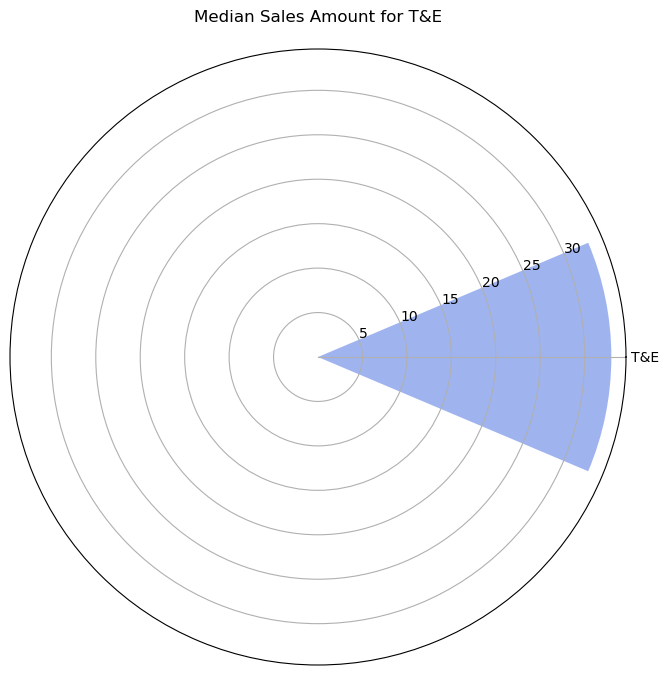

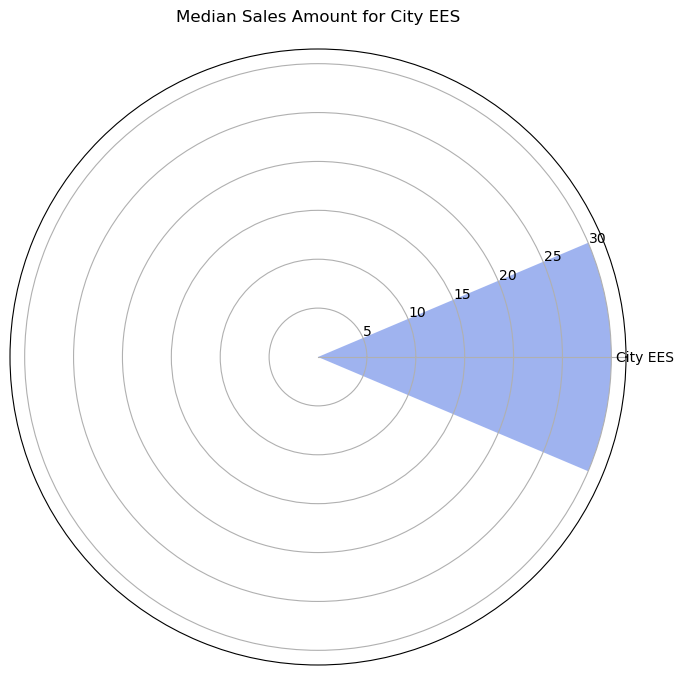

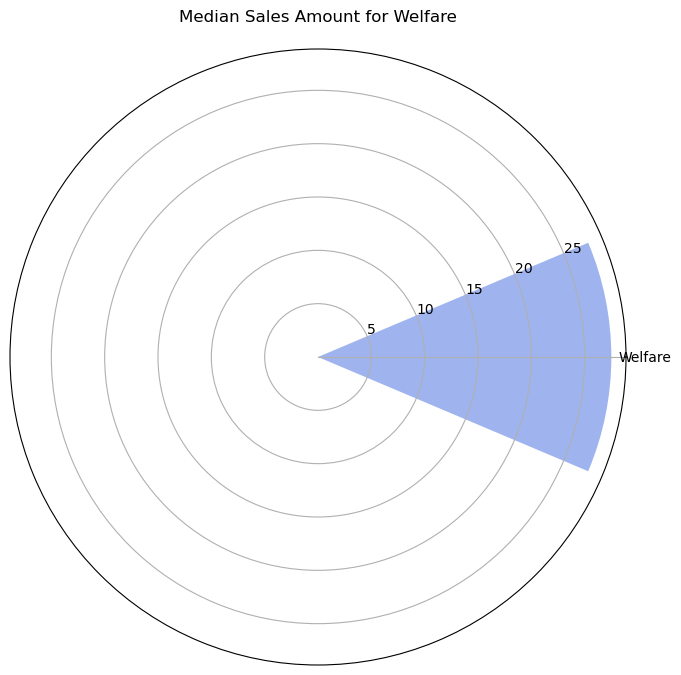

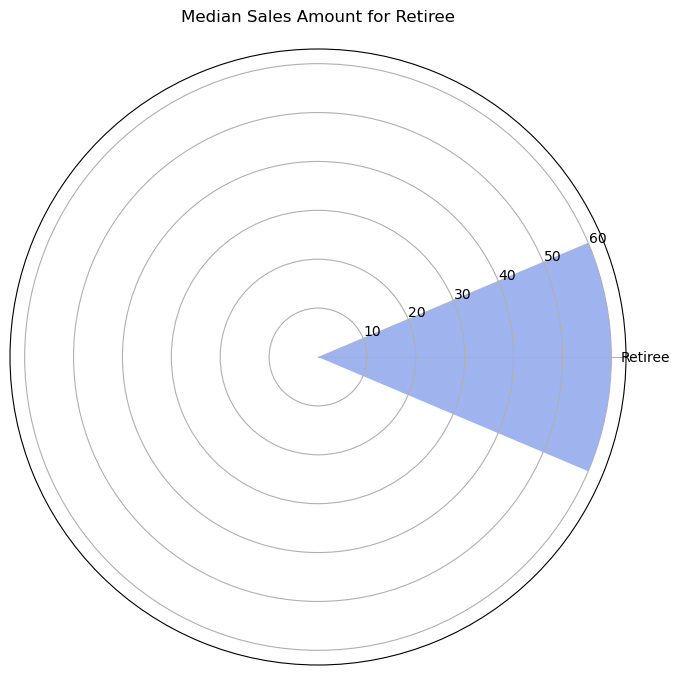

In [132]:
# Drop rows with null values
df = df.dropna(subset=['SalesAmount', 'DivisionName'])

# Create separate polar plots for each division
for division in df['DivisionName'].unique():
    division_df = df[df['DivisionName'] == division]

    # Calculate median Sales Amount for each division
    median_sales_amount = division_df.groupby('DivisionName')['SalesAmount'].median()

    # Create a polar plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)

    # Plot the median Sales Amount as bars
    bars = ax.bar(np.arange(len(median_sales_amount)), median_sales_amount.values, alpha=0.5, color='royalblue')

    # Set the labels for the division bins
    ax.set_xticks(np.arange(len(median_sales_amount)))
    ax.set_xticklabels(median_sales_amount.index, ha='center')  # Set the horizontal alignment

    # Set the title and labels
    ax.set_title(f'Median Sales Amount for {division}', pad=20)

    # Show the polar plot
    plt.show()


In [133]:
alt.renderers.enable('notebook')

# Drop rows with null values
df = df.dropna(subset=['SalesAmount', 'DivisionName'])

# Create separate interactive polar plots for each division
for division in df['DivisionName'].unique():
    division_df = df[df['DivisionName'] == division]

    # Calculate median Sales Amount for each division
    median_sales_amount = division_df.groupby('DivisionName')['SalesAmount'].median().reset_index()

    # Create an interactive bar chart using Altair
    chart = alt.Chart(median_sales_amount).mark_bar().encode(
        alt.X('DivisionName:N', title=f'{division}'),
        alt.Y('SalesAmount:Q', title='Median Sales Amount'),
        tooltip=['SalesAmount:Q']
    ).properties(
        title=f'Interactive Median Sales Amount for {division}'
    ).interactive()

    # Show the Altair chart
    chart.display()


ValueError: 
To use the 'notebook' renderer, you must install the vega package
and the associated Jupyter extension.
See https://altair-viz.github.io/getting_started/installation.html
for more information.


#### Dashboard Setup

In [24]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
import webbrowser

app = Dash(__name__)

app.layout = html.Div([
    # title
    html.H1(children=f'Interactive Debit Card Transaction Dashboard Using Dash {min_date} - {max_date}'),

    # ADD SUMMARY TAB
    dcc.Tabs([
        dcc.Tab(label='Annual Spending Summary', children=[
            # create a container to hold the graphs
            html.Div([
                # first graph in row
                html.Div([
                    dcc.Graph(figure=spend_cat(df))
                ], style={'width': '50%', 'marginBottom': '10px'}),

                # second graph in row
                html.Div([
                    dcc.Graph(figure=line_graph(df))
                ], style={'width': '50%', 'marginBottom': '10px'}),
            ], style={'display': 'flex', 'flexWrap': 'wrap'}),  

            # create a second container
            html.Div([
                # first graph in row
                html.Div([
                    dcc.Graph(figure=common_merchants(df))
                ], style={'width': '50%', 'marginBottom': '10px'}),

                # second graph in row
                html.Div([
                    dcc.Graph(figure=expense_merchants(df))
                ], style={'width': '50%', 'marginBottom': '10px'}),
            ], style={'display': 'flex', 'flexWrap': 'wrap'}),  

            # other graphs
            dcc.Graph(figure=pie_chart(df))
        ], style={'marginBottom': '10px'}),

        # ADD MONTHLY TAB
        dcc.Tab(label='Monthly Spending Data', children=[
            html.P('Select a Month:'),
            # add a dropdown to select a month
            dcc.Dropdown(
                id='month-dropdown',
                options=[
                    {'label': month, 'value': month} for month in df['PostedDate'].dt.month_name().unique()
                ],
                value=df['TransactionStartDate'].dt.month_name().unique()[0],  # set default to first month
                multi=False
            ),

            # graphs that depend on the selected month
            # create a container to hold the graphs
            html.Div([
                # first graph in row
                html.Div([
                    dcc.Graph(id='spend-cat')
                ], style={'width': '50%', 'marginBottom': '10px'}),

                # second graph in row
                html.Div([
                    dcc.Graph(id='line-graph')
                ], style={'width': '50%', 'marginBottom': '10px'}),
            ], style={'display': 'flex', 'flexWrap': 'wrap'}),

            # create a second container
            html.Div([
                # first graph in row
                html.Div([
                    dcc.Graph(id='common-merchants')
                ], style={'width': '50%', 'marginBottom': '10px'}),

                # second graph in row
                html.Div([
                    dcc.Graph(id='expense-merchants')
                ], style={'width': '50%', 'marginBottom': '10px'}),
            ], style={'display': 'flex', 'flexWrap': 'wrap'}),

            # other graphs
            dcc.Graph(id='piechart')
        ], style={'marginBottom': '10px'}),

        # ADD TAB WITH DIVISION INFO
        dcc.Tab(label='By Division', children=[
            # add visuals
            html.Div([
                # first graph in row
                html.Div([
                    dcc.Graph(figure=make_sankey(df, 'DivisionName', 'MerchantCategory', 'Values',
                                                  col1='DivisionName', col2='MerchantCategory'))
                ], style={'width': '50%', 'marginBottom': '10px'}),

                # second graph in row
                html.Div([
                    dcc.Graph(figure=spend_division(df))
                ], style={'width': '50%', 'marginBottom': '10px'}),
            ], style={'display': 'flex', 'flexWrap': 'wrap'}),  
        ], style={'marginBottom': '10px'}),

        ##########################################################################################################
        ## ADD PERFORM COMPARISON TAB
        ## ADD PERFORM COMPARISON TAB
        dcc.Tab(label='Make Comparisons', children=[
            html.Div([
                # choose topic 1
                html.Div([
                    html.P('Select Topic 1:'),
                    # add a dropdown to select a month
                    dcc.Dropdown(
                        id='topic-selector-1',
                        options=['total spending over time', 'division --> merchant cateogry', 'transaction type',
                                 'spending by category', 'spending by merchant'],
                        value='total spending over time',  # default to first option
                        multi=False
                    ),
                ], style={'width': '50%', 'display': 'inline-block', 'marginBottom': '10px'}),

                # choose topic 2
                html.Div([
                    html.P('Select Topic 2:'),
                    # add a dropdown to select a month
                    dcc.Dropdown(
                        id='topic-selector-2',
                        options=['total spending over time', 'division --> merchant cateogry', 'transaction type',
                                 'spending by category', 'spending by merchant'],
                        value='total spending over time',  # default to first option
                        multi=False
                    ),
                ], style={'width': '50%', 'display': 'inline-block', 'marginBottom': '10px'}),

                # Dropdown for Month 1
                html.Div([
                    html.P('Select Month 1:'),
                    dcc.Dropdown(
                        id='month-selector-1',
                        options=[{'label': month, 'value': month} for month in df['PostedDate'].dt.month_name().unique()],
                        value=df['TransactionStartDate'].dt.month_name().unique()[0],  # set default to first month
                        multi=False
                    ),
                ], style={'width': '50%', 'display': 'inline-block', 'marginBottom': '10px'}),

                # Dropdown for Month 2
                html.Div([
                    html.P('Select Month 2:'),
                    dcc.Dropdown(
                        id='month-selector-2',
                        options=[{'label': month, 'value': month} for month in df['PostedDate'].dt.month_name().unique()],
                        value=df['TransactionStartDate'].dt.month_name().unique()[0],  # set default to first month
                        multi=False
                    ),
                ], style={'width': '50%', 'display': 'inline-block', 'marginBottom': '10px'}),
            ]),

            # Graphs for Comparisons
            dcc.Graph(id='comparison-1', style={'width': '50%', 'display': 'inline-block'}),
            dcc.Graph(id='comparison-2', style={'width': '50%', 'display': 'inline-block'})
        ], style={'marginBottom': '10px'}),
    ])
])

# UPDATE THE GRAPHS BASED ON THE MONTH SELECTED
@app.callback(
    [
        Output('spend-cat', 'figure'),
        Output('line-graph', 'figure'),
        Output('common-merchants', 'figure'),
        Output('expense-merchants', 'figure'),
        Output('pie_chart', 'figure'),
    ],
    [Input('month-dropdown', 'value')]
)
def update_graphs(selected_month):
    # filter based on selected_month
    filtered_df = df[df['PostedDate'].dt.month_name() == selected_month]
    # update each figure
    categories = spend_cat(filtered_df)
    updated_line = line_graph(filtered_df)
    merchants_common = common_merchants(filtered_df)
    merchants_spend = expense_merchants(filtered_df)
    pie = pie_chart(filtered_df)
    # return figures
    return categories, updated_line, merchants_common, merchants_spend, pie


# UPDATE THE GRAPHS BASED ON THE MONTH SELECTED AND GRAPH SELECTED
@app.callback(
    [
        Output('comparison-1', 'figure'),
        Output('comparison-2', 'figure'),
    ],
    [
        Input('month-selector-1', 'value'),
        Input('month-selector-2', 'value'), 
        Input('topic-selector-1', 'value'),
        Input('topic-selector-2', 'value')
    ]
)
def comparison_graphs(month1, month2, topic1, topic2):
    
    # filter based on selected months
    filtered_df1 = df[df['PostedDate'].dt.month_name() == month1]
    filtered_df2 = df[df['PostedDate'].dt.month_name() == month2]
    
    figure1 = None
    figure2 = None
    
    if topic1 == 'total spending over time':
        figure1 = line_graph(filtered_df1)
    elif topic1 == 'division --> merchant cateogry':
        figure1 = make_sankey(filtered_df1, 'DivisionName', 'MerchantCategory', 'Values',
                                                  col1='DivisionName', col2='MerchantCategory')
    elif topic1 == 'transaction type':
        figure1 = pie_chart(filtered_df1)
    elif topic1 == 'spending by category':
        figure1 = spend_cat(filtered_df1)
    elif topic1 == 'spending by merchant':
        figure1 = expense_merchants(filtered_df1)
    

    if topic2 == 'total spending over time':
        figure2 = line_graph(filtered_df2)
    elif topic2 == 'division --> merchant cateogry':
        figure2 = make_sankey(filtered_df2, 'DivisionName', 'MerchantCategory', 'Values',
                                                  col1='DivisionName', col2='MerchantCategory')
    elif topic2 == 'transaction type':
        figure2 = pie_chart(filtered_df2)
    elif topic2 == 'spending by category':
        figure2 = spend_cat(filtered_df2)
    elif topic2 == 'spending by merchant':
        figure2 = expense_merchants(filtered_df2)

    return figure1, figure2

if __name__ == '__main__':
    # define
    host = '0.0.0.0'
    port = 8050
    debug = False

    # open in browser
    url = f'http://{host}:{port}/'
    webbrowser.open(url, new=2)  # open in new tab

    # run
    app.run(host='0.0.0.0', port=8050, debug=False)


/Users/katerineosorio/anaconda3/envs/myenv/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:102: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/var/folders/62/mz1wg80n407bz3b_1h0t6szc0000gn/T/ipykernel_8085/230644815.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/62/mz1wg80n407bz3b_1h0t6szc0000gn/T/ipykernel_8085/402051764.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

TypeError: pie_chart() takes 0 positional arguments but 1 was given